In [149]:
import pandas as pd
import numpy as np

In [150]:
df = pd.read_csv("resul.csv")

In [151]:
df.head()

,main,guest,for_1,for_2,hav_1,hav_2,corn
0,Динамо,ЦСКА,2,1,4,5,10
1,Крылья,Уфа,2,1,3,5,13
2,Сочи,Ахмат,2,0,4,5,18
3,Урал,Сочи,1,2,5,5,9
4,Сочи,Краснодар,3,3,2,3,14


In [152]:
df["def_1"] = 10 - df["for_1"] - df["hav_1"]
df["def_2"] = 10 - df["for_2"] - df["hav_2"]

In [153]:
X = df.drop(columns = "corn")
y = df["corn"]

In [154]:
team_preprocessing = {j:i for i,j in enumerate(df["main"].unique())}
print(team_preprocessing)

{'Динамо': 0, 'Крылья': 1, 'Сочи': 2, 'Урал': 3, 'Краснодар': 4, 'Тамбов': 5, 'Ахмат': 6, 'Арсенал': 7, 'Рубин': 8, 'Локомотив': 9, 'Зенит': 10, 'Оренбург': 11, 'Спартак': 12, 'ЦСКА': 13, 'Ростов': 14, 'Уфа': 15, 'Ротор': 16, 'Химки': 17}


In [155]:
X["main"] = X["main"].map(team_preprocessing)
X["guest"] = X["guest"].map(team_preprocessing)

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state = 123, test_size = 0.05)

In [157]:
input_shape = [X.shape[1]]

In [158]:
from tensorflow import keras
from tensorflow.keras import layers


In [159]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dropout(rate = 0.2),
    layers.Dense(18, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.2),
    layers.Dense(18, activation = "relu"),
    layers.Dense(1)
])

In [160]:
model.compile(
    loss = "mae",
    optimizer = "adam"
)

In [161]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.1,
    patience = 100,
    restore_best_weights = True
)

In [162]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 10,
    epochs = 10000,
    callbacks = [early_stopping]
)

Epoch 1/10000
22/22 [==============================] - 0s 11ms/step - loss: 9.1973 - val_loss: 9.2122
Epoch 2/10000
22/22 [==============================] - 0s 3ms/step - loss: 8.6180 - val_loss: 8.3980
Epoch 3/10000
22/22 [==============================] - 0s 5ms/step - loss: 8.0694 - val_loss: 7.5448
Epoch 4/10000
22/22 [==============================] - 0s 4ms/step - loss: 7.4371 - val_loss: 6.6209
Epoch 5/10000
22/22 [==============================] - 0s 3ms/step - loss: 6.7829 - val_loss: 5.5447
Epoch 6/10000
22/22 [==============================] - 0s 4ms/step - loss: 6.0106 - val_loss: 4.5484
Epoch 7/10000
22/22 [==============================] - 0s 4ms/step - loss: 5.5442 - val_loss: 3.7259
Epoch 8/10000
22/22 [==============================] - 0s 4ms/step - loss: 5.1337 - val_loss: 2.8929
Epoch 9/10000
22/22 [==============================] - 0s 4ms/step - loss: 4.5208 - val_loss: 2.2480
Epoch 10/10000
22/22 [==============================] - 0s 4ms/step - loss: 4.1195 - val_l

22/22 [==============================] - 0s 4ms/step - loss: 2.6228 - val_loss: 1.2787
Epoch 82/10000
22/22 [==============================] - 0s 4ms/step - loss: 2.6429 - val_loss: 1.3164
Epoch 83/10000
22/22 [==============================] - 0s 4ms/step - loss: 2.6357 - val_loss: 1.2919
Epoch 84/10000
22/22 [==============================] - 0s 4ms/step - loss: 2.4513 - val_loss: 1.2854
Epoch 85/10000
22/22 [==============================] - 0s 4ms/step - loss: 2.5833 - val_loss: 1.3039
Epoch 86/10000
22/22 [==============================] - 0s 4ms/step - loss: 2.4794 - val_loss: 1.3380
Epoch 87/10000
22/22 [==============================] - 0s 3ms/step - loss: 2.5541 - val_loss: 1.2904
Epoch 88/10000
22/22 [==============================] - 0s 3ms/step - loss: 2.6217 - val_loss: 1.2502
Epoch 89/10000
22/22 [==============================] - 0s 4ms/step - loss: 2.5078 - val_loss: 1.2386
Epoch 90/10000
22/22 [==============================] - 0s 4ms/step - loss: 2.5346 - val_loss: 1.

<AxesSubplot:>

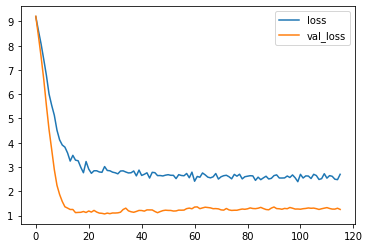

In [163]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "val_loss"]].plot()

In [167]:
game_1 = np.array([17,8,1,1,5,5,4,4]).reshape(1,8)
print(model.predict(game_1))
#true score 11

[[8.9467745]]


In [168]:
game_2 = np.array([3,12,1,3,5,3,4,4]).reshape(1,8)
print(model.predict(game_2))
#true score 13

[[7.41287]]


In [ ]:
#underfitting
#very small sample
#I will increase it